# Blood Changes

In [23]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [15]:
namedNames <- function(x) {n <- names(x); names(n) <- n; n}

In [12]:
input_dir_path <- 'summarized_trajectories/'
files <- list.files(input_dir_path)
names <- gsub('.csv$','',files)
files <- paste0(input_dir_path, files)
names(files) <- names

In [13]:
files

adrenal_summarized 
   "summarized_trajectories/adrenal_summarized.csv" 
                                   brain_summarized 
     "summarized_trajectories/brain_summarized.csv" 
                                  kidney_summarized 
    "summarized_trajectories/kidney_summarized.csv" 
                                   liver_summarized 
     "summarized_trajectories/liver_summarized.csv" 
                                    lung_summarized 
      "summarized_trajectories/lung_summarized.csv" 
                              lymph_node_summarized 
"summarized_trajectories/lymph_node_summarized.csv" 
                                    skin_summarized 
      "summarized_trajectories/skin_summarized.csv"

In [20]:
all_data <- do.call(rbind, lapply(namedNames(files), function(n) {x <- files[n]; d <- read.csv(x); d$sample <- n; d} ))

In [21]:
head(all_data)

,X,Time,Component,percent,sample
,<int>,<dbl>,<chr>,<dbl>,<chr>
adrenal_summarized.1,0,0.000000000,Blood,0.1049433,adrenal_summarized
adrenal_summarized.2,1,0.008008008,Blood,0.1049477,adrenal_summarized
adrenal_summarized.3,2,0.016016016,Blood,0.1049531,adrenal_summarized
adrenal_summarized.4,3,0.024024025,Blood,0.1049594,adrenal_summarized
adrenal_summarized.5,4,0.032032030,Blood,0.1049667,adrenal_summarized
adrenal_summarized.6,5,0.040040040,Blood,0.1049748,adrenal_summarized


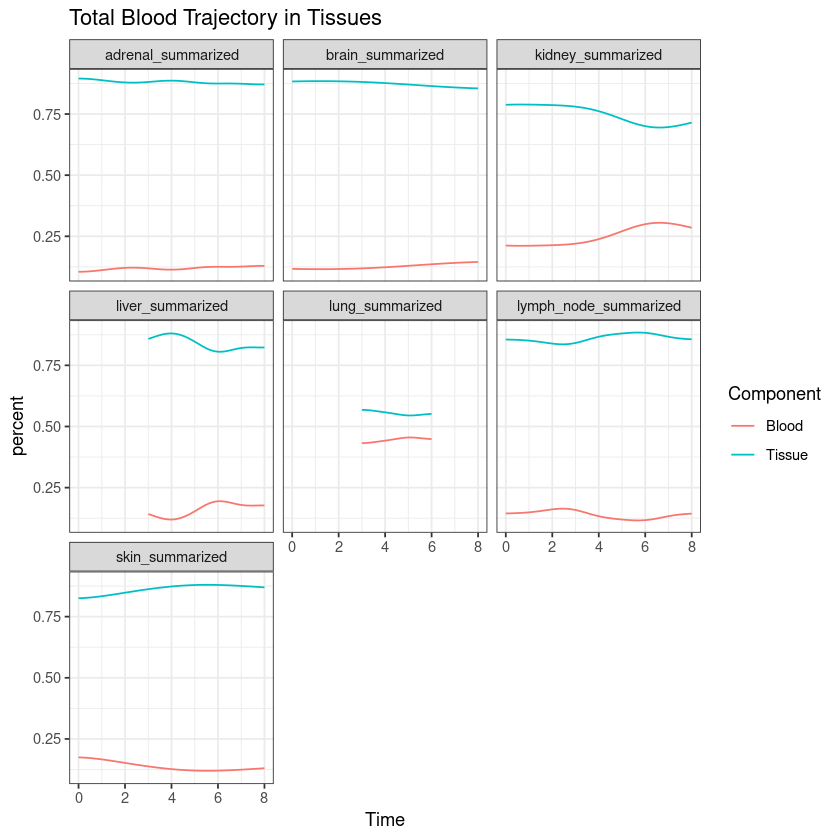

In [33]:
all_data %>% 
    ggplot(aes(x=Time, y= percent, color=Component)) + facet_wrap(~sample) + geom_line() + theme_bw() + ggtitle('Total Blood Trajectory in Tissues')

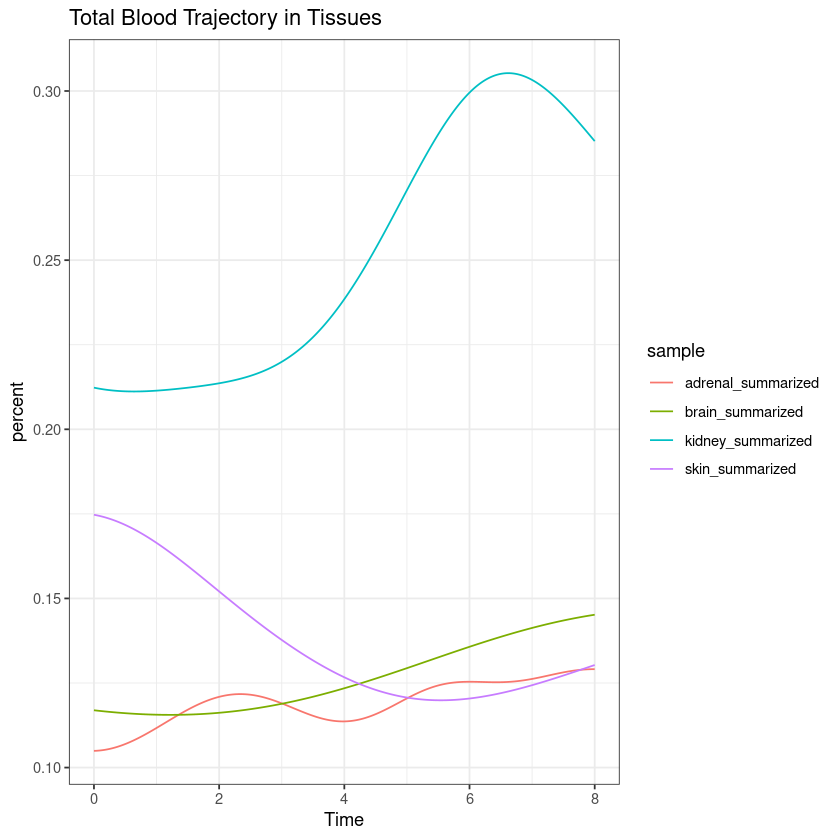

In [36]:
all_data %>% filter(Component == 'Blood') %>% 
    filter(sample %in% c('adrenal_summarized', 'brain_summarized','kidney_summarized','skin_summarized')) %>%
    ggplot(aes(x=Time, y= percent, color=sample)) + geom_line() + theme_bw() + ggtitle('Total Blood Trajectory in Tissues')

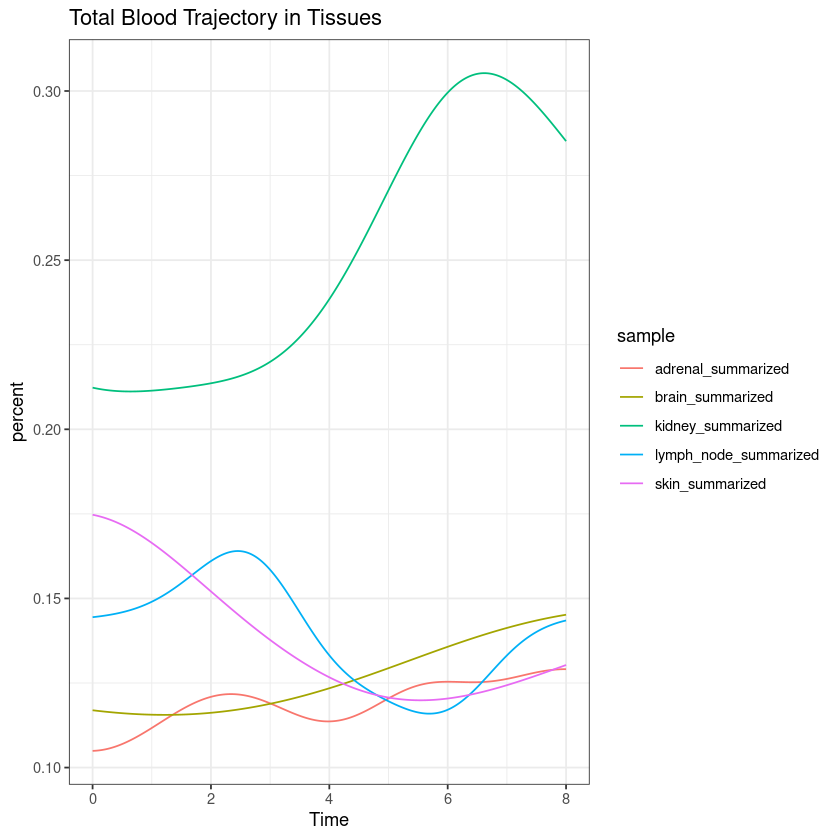

In [37]:
all_data %>% filter(Component == 'Blood') %>% 
    filter(sample %in% c('adrenal_summarized', 'brain_summarized','kidney_summarized','skin_summarized','lymph_node_summarized')) %>%
    ggplot(aes(x=Time, y= percent, color=sample)) + geom_line() + theme_bw() + ggtitle('Total Blood Trajectory in Tissues')